In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score,f1_score
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from imblearn.over_sampling import SMOTE


In [39]:
'Getting data'

df=pd.read_csv('../data/Womens Clothing E-Commerce Reviews.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [4]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
len(df.dropna())

19662

In [40]:
'Dropping Null rows'
df.dropna(inplace=True)

In [6]:
str_column=df.select_dtypes(include='object').columns.tolist()
num_column=df.select_dtypes(exclude='object').columns.tolist()


In [7]:
str_column

['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

In [8]:
num_column

['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [11]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477
std,200.227528,12.258122,1.112224,0.385708,5.834285
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


<Axes: xlabel='Recommended IND', ylabel='count'>

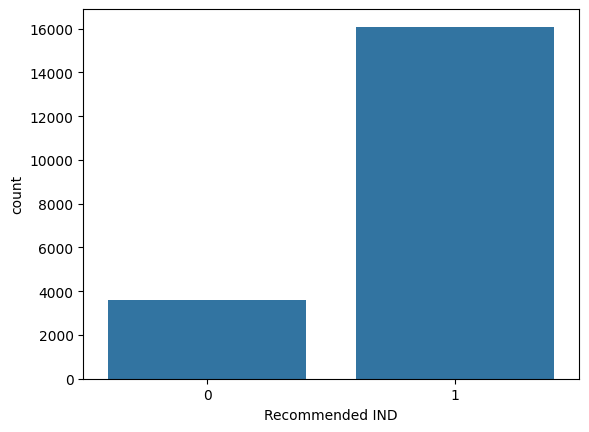

In [41]:
'Class is Imbalance'

sns.countplot(x = df["Recommended IND"], data = df)

<Axes: xlabel='Rating', ylabel='count'>

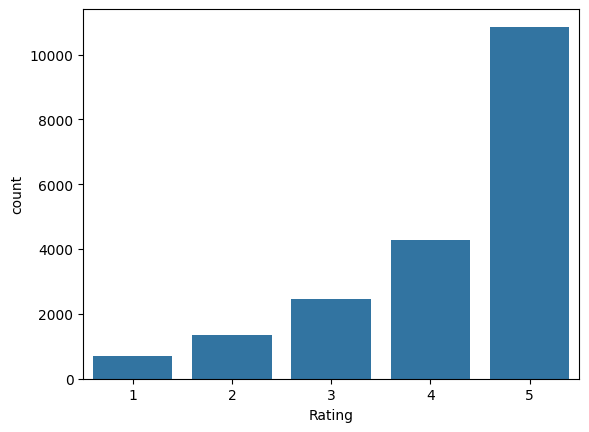

In [13]:
sns.countplot(x="Rating", data=df)

In [15]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [16]:
df.drop(['Clothing ID','Positive Feedback Count','Title'],axis=1,inplace=True)

In [38]:
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,60,high hope dress realli want work initi order ...,3,0,General,Dresses,Dresses
3,50,love love love jumpsuit fun flirti fabul ...,5,1,General Petite,Bottoms,Pants
4,47,shirt flatter due adjust front tie perfect le...,5,1,General,Tops,Blouses
5,49,love traci rees dress one petit 5 feet tall ...,2,0,General,Dresses,Dresses
6,39,ade basket hte last mintu see would look like ...,5,1,General Petite,Tops,Knits


In [18]:
len(df.drop_duplicates())

19657

In [42]:
'Drop Duplicate rows'

df.drop_duplicates(inplace=True)

In [20]:
df.head(2)

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants


In [43]:
'Basic Preprocessing Function'

def preprocess(text):
    tokens=word_tokenize(text)

    tokens=[token.lower()for token in tokens]

    tokens =[re.sub(r'[^\w\s]','',token)for token in tokens]

    stop_words=set(stopwords.words('english'))

    tokens=[token for token in tokens if token not in stop_words]

    stemmer=PorterStemmer()
    tokens=[stemmer.stem(token)for token in tokens]

    preprocessed_text=' '.join(tokens)
    return preprocessed_text

In [22]:
df['Review Text']=df['Review Text'].apply(preprocess)

In [23]:
df

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,60,high hope dress realli want work initi order ...,3,0,General,Dresses,Dresses
3,50,love love love jumpsuit fun flirti fabul ...,5,1,General Petite,Bottoms,Pants
4,47,shirt flatter due adjust front tie perfect le...,5,1,General,Tops,Blouses
5,49,love traci rees dress one petit 5 feet tall ...,2,0,General,Dresses,Dresses
6,39,ade basket hte last mintu see would look like ...,5,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...
23481,34,happi snag dress great price easi slip flatte...,5,1,General Petite,Dresses,Dresses
23482,48,remind matern cloth soft stretchi shini mat...,3,1,General Petite,Tops,Knits
23483,31,fit well top see never would work glad abl ...,3,0,General Petite,Dresses,Dresses
23484,28,bought dress wed summer cute unfortun fit nt...,3,1,General,Dresses,Dresses


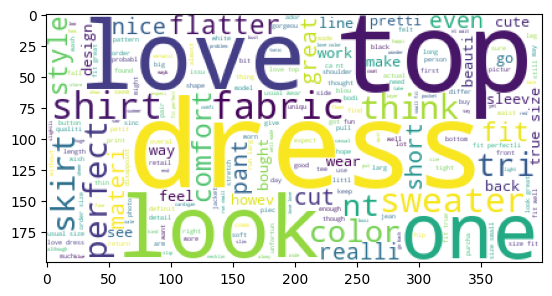

In [24]:
from wordcloud import WordCloud 

text = " ".join(df['Review Text'].dropna().astype(str))
wordcloud = WordCloud(background_color="white", max_words =250).generate(text)
plt.imshow(wordcloud)

<Axes: xlabel='Recommended IND'>

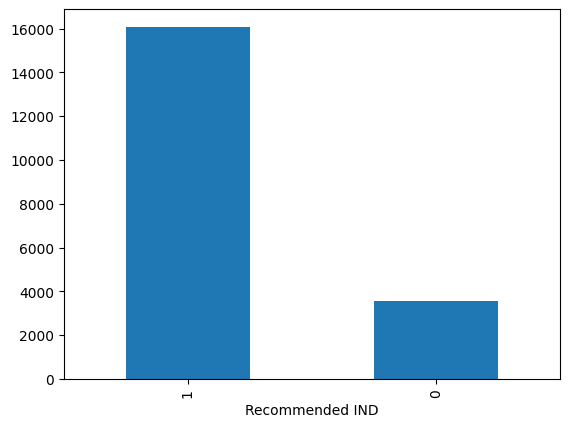

In [25]:
df["Recommended IND"].value_counts().plot(kind='bar')

In [26]:
# Separate features and target
X = df['Review Text']
y = df['Recommended IND']

In [44]:
'Train test split'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
X_train

1655     run realli big  usual wear got small need xs t...
15682    nice  flatter thing worn dress shirt  therefor...
10634    return multipl pair trouser fall low qualiti w...
15570    good design  comfort fit  howev  size way  34c...
11787    design qualiti great  realli want fit ran larg...
                               ...                        
13501    sweater weirdest stitch  although button sleev...
14294    bought earli season  probabl wash worn  8 time...
6441     order usual sizesmal  perfect enough room fit ...
1057     top remind matern top  cute  better suit someo...
18888    agre anoth review said get  fish print ador  c...
Name: Review Text, Length: 15725, dtype: object

In [29]:
type(X_test), type(y_test), type(X_train), type(y_train)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [45]:
'Text to integer for best performace of model'

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [46]:
'This will balance out the class'

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [47]:
X_train_resampled.shape

(25796, 10921)

In [33]:
y_train_resampled.shape

(25796,)

In [34]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'MultinomialNB': MultinomialNB(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier':XGBClassifier()
}

# Define evaluation function
def evaluate_model(true, predicted):
    f1 = f1_score(true, predicted)
    acc = accuracy_score(true, predicted)
    return f1, acc

# Initialize lists to store results
model_list = []
acc_list = []
f1_list = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_tfidf)
    
    # Evaluate Test dataset
    model_f1, model_acc = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)
    acc_list.append(model_acc)
    f1_list.append(model_f1)

LogisticRegression
MultinomialNB


/Users/akashmukherjee/Programming/Practise ML/Women E-commerce/ml_package/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier
RandomForestClassifier
DecisionTreeClassifier
XGBClassifier


In [48]:
# Getting best performing model at the top


results_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': acc_list,
    'F1 Score': f1_list
}).sort_values(by='Accuracy',ascending=False)

In [36]:
results_df

,Model,Accuracy,F1 Score
5,XGBClassifier,0.874873,0.925000
0,LogisticRegression,0.869786,0.916531
3,RandomForestClassifier,0.863428,0.919454
1,MultinomialNB,0.851729,0.902914
2,AdaBoostClassifier,0.843845,0.903368
4,DecisionTreeClassifier,0.788403,0.869059
